# <ins>UNDERSAMPLING AVEC RANDOMFORESTCLASSIFIER</ins>

## <ins>BUT DU NOTEBOOK </ins>

Les méthodes d'Undersampling fonctionnent en diminuant le nombre d'observations de la / des classes majoritaires afin d'arriver à un ratio classe minoritaire / classe majoritaire satisfaisant.
Elles fonctionnent par sélection ou génération d'échantillons.

L'ensemble des méthodes d'Undersampling disponibles dans le package imblearn est disponible ici.
Nous nous contenterons d'aborder l'Undersampling aléatoire, qui sélectionne aléatoirement une partie des données, et l'algorithme de ClusterCentroids qui utilise des méthodes de Clustering pour génerer un certain nombre de centroïdes à partir des données d'origine.

## <ins>IMPORT DES LIBRAIRIES ET DU DATASET</ins>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids

import pickle

import projet_rakuten

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-05-07 20:59:12.292422: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-07 20:59:13.486455: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('df_preprocess.csv', index_col = [0])

In [3]:
df.head()

,prdtypecode,filepath,produit_clean
1,2280,./images/train/image_1008141237_product_436067...,journal art 2001 art marche salon art asiatiqu...
2,50,./images/train/image_938777978_product_2011151...,grand stylet ergonomique bleu gamepad nintendo...
3,1280,./images/train/image_457047496_product_5041875...,peluche donald europe disneyland 2000 marionne...
4,2705,./images/train/image_1077757786_product_278535...,guerre tuques luc idées grandeur veut organise...
5,2280,./images/train/image_393356830_product_5862738...,afrique contemporaine hiver 2004 dossier japon...


## <ins>SPLIT ET TOKENISATION</ins>

In [4]:
# PARTAGE DE NOTRE DATASET EN 2 DATASET TRAIN ET VALIDATION

features = df['produit_clean']
target = df['prdtypecode']

# Ayant un désequilibre de classe, nous ajoutons l'argument stratify
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=123, stratify = target)

display('Shape X_train : ', X_train.shape)
display('Shape X_test : ', X_test.shape)

'Shape X_train : '

(64716,)

'Shape X_test : '

(11421,)

In [5]:
# Nous nous limitons aux 1000 mots les plus utilisés
vectorizer = CountVectorizer(max_features = 1000)

X_train = vectorizer.fit_transform(X_train).todense() # todense permet de supprimer les valeurs nulles pour véiter les matrices creuses

X_test = vectorizer.transform(X_test).todense()

## <ins>UNDERSAMPLING SMOTE ET RANDOMOVERSAMPLER</ins>

In [6]:
rus = RandomUnderSampler()

cc = ClusterCentroids()

X_train = np.asarray(X_train)

X_test = np.asarray(X_test)

X_ru, y_ru = rus.fit_resample(X_train, y_train)

X_cc, y_cc = cc.fit_resample(X_train, y_train)

print('Classes échantillon undersampled :', dict(pd.Series(y_ru).value_counts()))
print('Classes échantillon ClusterCentroids :', dict(pd.Series(y_cc).value_counts()))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (474) found smaller than n_clusters (546). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (494) found smaller than n_clusters (546). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (537) found smaller than n_clusters (546). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Classes échantillon undersampled : {10: 546, 40: 546, 50: 546, 60: 546, 1140: 546, 1160: 546, 1180: 546, 1280: 546, 1281: 546, 1300: 546, 1301: 546, 1302: 546, 1320: 546, 1560: 546, 1920: 546, 1940: 546, 2060: 546, 2220: 546, 2280: 546, 2403: 546, 2462: 546, 2522: 546, 2582: 546, 2583: 546, 2585: 546, 2705: 546, 2905: 546}
Classes échantillon ClusterCentroids : {10: 546, 40: 546, 50: 546, 60: 546, 1140: 546, 1160: 546, 1180: 546, 1280: 546, 1281: 546, 1300: 546, 1301: 546, 1302: 546, 1320: 546, 1560: 546, 1920: 546, 1940: 546, 2060: 546, 2220: 546, 2280: 546, 2403: 546, 2462: 546, 2522: 546, 2582: 546, 2583: 546, 2585: 546, 2705: 546, 2905: 546}


In [7]:
rdf = RandomForestClassifier(max_features='log2', n_estimators=1000, n_jobs=-1, random_state=22)

# Transformation en np array pour notre modèke
X_ru = np.asarray(X_ru)

rdf.fit(X_ru, y_ru)

RandomForestClassifier(max_features='log2', n_estimators=1000, n_jobs=-1,
                       random_state=22)

Début de la prédiction à 21:00:17
Fin de la récupération à 21:00:21
Délai du modèle pour la prédiction :  0:00:04.077183
ACCURACY DU MODELE :  0.8840727174060508

F1_SCORE_WEIGHTED :  0.8971259654314394

              precision    recall  f1-score   support

          10       0.30      0.86      0.44       546
          40       0.75      0.67      0.71       546
          50       0.98      0.94      0.96       546
          60       1.00      0.96      0.98       546
        1140       0.87      0.79      0.83       546
        1160       0.87      0.65      0.74       546
        1180       0.90      0.60      0.72       546
        1280       0.99      0.92      0.95       546
        1281       0.92      0.92      0.92       546
        1300       1.00      0.92      0.96       546
        1301       0.97      0.94      0.96       546
        1302       0.98      0.97      0.97       546
        1320       0.97      0.93      0.95       546
        1560       1.00      0.99      

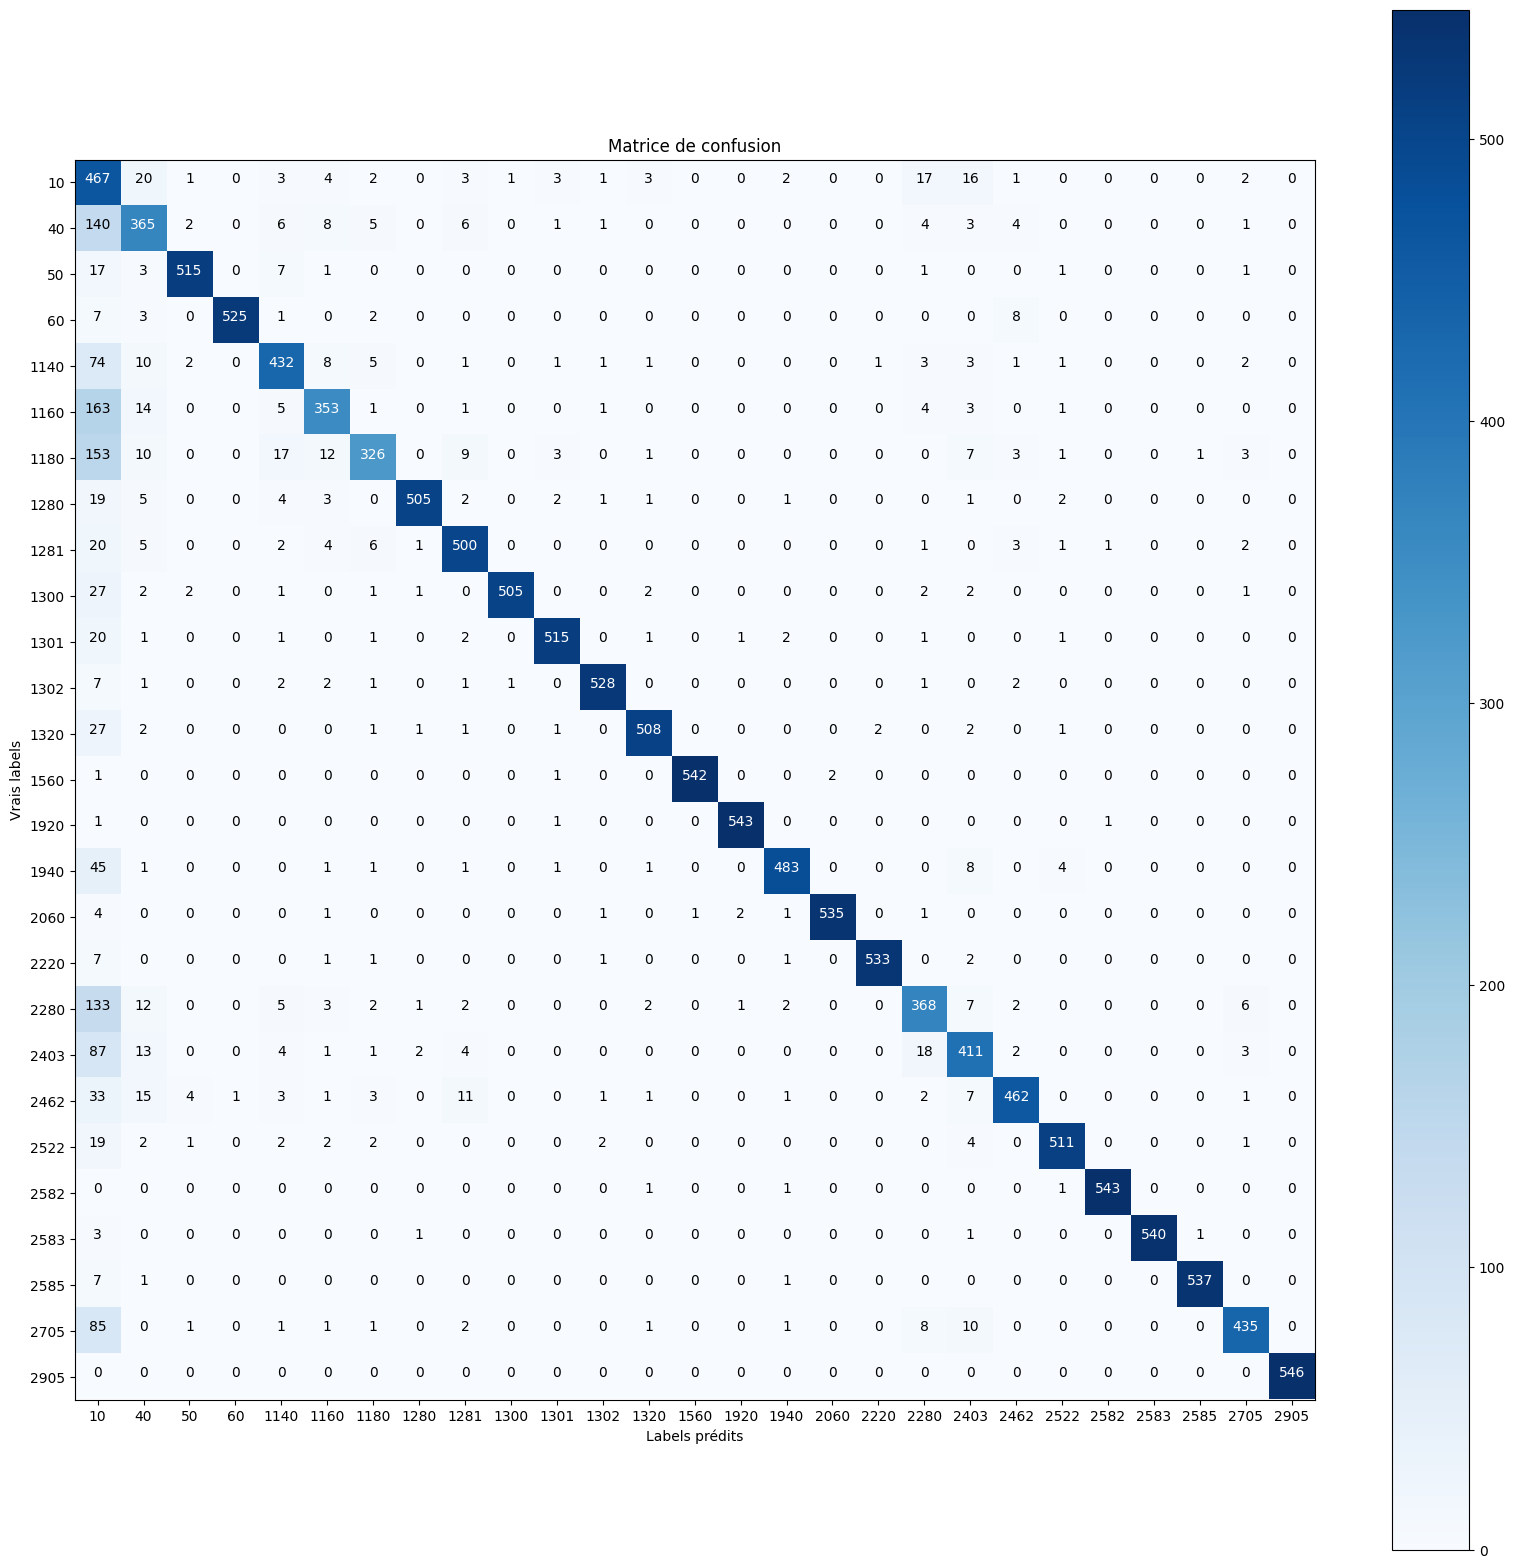



 Sauvegarde de notre modèle dans le répertoire ./sauvegarde_modele/RandomForest_Undersampling_RUS/


(array([2280,   10, 1300, ..., 2905, 2905, 2905]),
 array([[4.57692429e-01, 2.47927822e-02, 9.48796503e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.84463284e-01, 1.06397256e-01, 1.15970424e-02, ...,
         4.71223864e-03, 6.22458786e-02, 0.00000000e+00],
        [3.46319700e-01, 8.46309737e-04, 9.22282384e-05, ...,
         3.15724036e-05, 4.94343500e-04, 0.00000000e+00],
        ...,
        [5.25000000e-03, 4.12656642e-03, 0.00000000e+00, ...,
         0.00000000e+00, 1.90000000e-02, 9.03000000e-01],
        [5.00000000e-03, 0.00000000e+00, 2.00000000e-03, ...,
         4.00000000e-03, 7.50000000e-02, 8.55000000e-01],
        [0.00000000e+00, 0.00000000e+00, 2.00000000e-03, ...,
         0.00000000e+00, 7.00000000e-03, 9.82000000e-01]]))

In [8]:
from projet_rakuten import predict_randomforest

filepath = './sauvegarde_modele/RandomForest_Undersampling_RUS/'

predict_randomforest(rdf, X_ru, y_ru, save_filepath=filepath)

In [9]:
X_cc = np.asarray(X_cc)

rdf.fit(X_cc, y_cc)

RandomForestClassifier(max_features='log2', n_estimators=1000, n_jobs=-1,
                       random_state=22)

Début de la prédiction à 21:01:41
Fin de la récupération à 21:01:45
Délai du modèle pour la prédiction :  0:00:03.883329
ACCURACY DU MODELE :  0.9873829873829874

F1_SCORE_WEIGHTED :  0.9876059875481139

              precision    recall  f1-score   support

          10       0.98      0.97      0.97       546
          40       1.00      0.99      0.99       546
          50       1.00      1.00      1.00       546
          60       1.00      1.00      1.00       546
        1140       1.00      0.99      1.00       546
        1160       0.97      0.95      0.96       546
        1180       0.83      0.98      0.90       546
        1280       0.99      0.99      0.99       546
        1281       0.99      1.00      1.00       546
        1300       1.00      1.00      1.00       546
        1301       0.99      0.95      0.97       546
        1302       1.00      1.00      1.00       546
        1320       1.00      1.00      1.00       546
        1560       1.00      1.00      

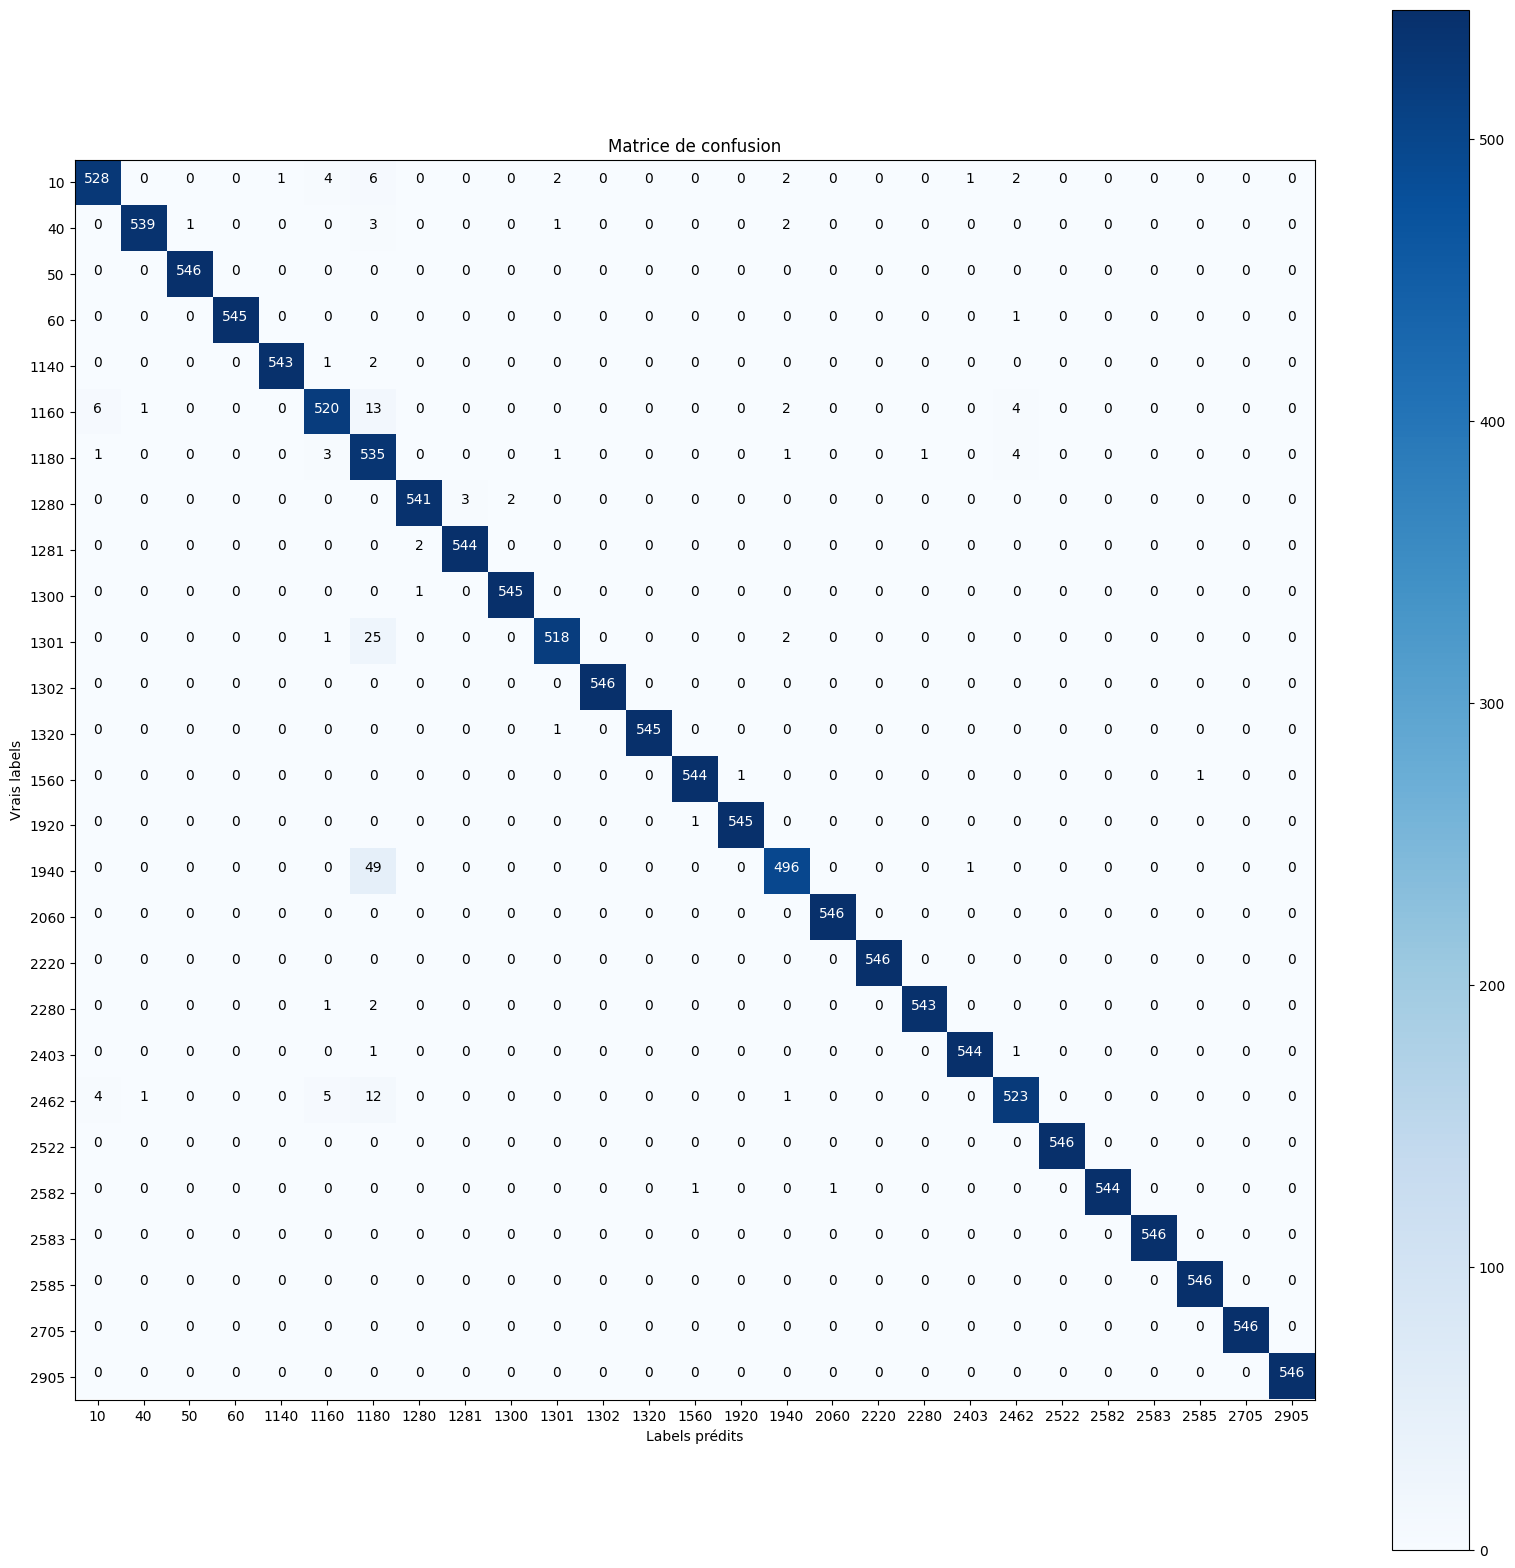



 Sauvegarde de notre modèle dans le répertoire ./sauvegarde_modele/RandomForest_Undersampling_Cc/


(array([  10,   10,   10, ..., 2905, 2905, 2905]),
 array([[0.642, 0.004, 0.   , ..., 0.   , 0.   , 0.   ],
        [0.621, 0.005, 0.   , ..., 0.   , 0.001, 0.   ],
        [0.983, 0.   , 0.001, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.994],
        [0.   , 0.005, 0.003, ..., 0.002, 0.001, 0.979],
        [0.002, 0.008, 0.008, ..., 0.012, 0.031, 0.804]]))

In [11]:
filepath = './sauvegarde_modele/RandomForest_Undersampling_Cc/'

predict_randomforest(rdf, X_cc, y_cc, save_filepath=filepath)